# Fit emimTF2N data with original parameter formulation - linear T dependence of BIP

In [1]:
# import functions
import idaes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)
from pyomo.network import Arc, SequentialDecomposition
from idaes.core.util.initialization import propagate_state
from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom
# parmest (binary_param2)
from binary_param import cuadratic
# import pressure and plot functions
# from binary_fitting_functions import calc_outlet_xP
# from binary_fitting_functions import plot_sens_analysis

In [2]:
from hfc32_emimtf2n_PR import configuration 

In [3]:
# Subset of data
data = pd.read_csv('r32_emimtf2n_subset.csv')
data

,temperature,pressure,x_R32,x_emimTf2N
0,283.15,100100,0.136,0.864
1,283.15,250300,0.306,0.694
2,283.15,399300,0.448,0.552
3,283.15,549300,0.570,0.430
4,283.15,700400,0.672,0.328
5,283.15,849400,0.786,0.214
6,298.15,99800,0.095,0.905
7,298.15,250200,0.218,0.782
8,298.15,399400,0.325,0.675
9,298.15,549400,0.417,0.583


In [4]:
# 283
data_283= data[(data.temperature > 282) & (data.temperature< 284)]

# 298
data_298 = data[(data.temperature > 297) & (data.temperature< 299)]
data_298 = data_298.reset_index(drop=True)

# 323
data_323 = data[(data.temperature > 322) & (data.temperature< 324)]
data_323 = data_323.reset_index(drop=True)

# 348
data_348 = data[(data.temperature > 347) & (data.temperature< 349)]
data_348 = data_348.reset_index(drop=True)

In [5]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))


    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in 7.0) (called from /Users/bridgettebefort/Dowling-
    Maginn-Lab/DowlingLab/IL-MD/idaes-
    pse/idaes/generic_models/properties/core/state_definitions/FTPx.py:178)
    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in 7.0) (called from /Users/bridgettebefort/Dowling-
    Maginn-Lab/DowlingLab/IL-MD/idaes-
    pse/idaes/generic_models/properties/core/state_definitions/FTPx.py:176)
The initial DOF is 7


In [6]:
cuadratic(data, configuration, 'R32', 'emimTf2N', "x_R32", "x_emimTf2N", 
    init_temp =  283.1, init_press =   399300 , init_x_c1 =    0.448, init_x_c2 = 0.552,
    init_kappa_2_1A = 8.8718, init_kappa_1_2A = 1.1017,
    init_kappa_2_1B = -15.8940, init_kappa_1_2B = -1.9784,
    init_kappa_2_1C = 6.8469053671, init_kappa_1_2C = 0.8358154970, 
    eps = 0.1, scaling_fac = 1e-7)

2021-09-13 09:28:17 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-09-13 09:28:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-09-13 09:28:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-09-13 09:28:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-09-13 09:28:19 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-09-13 09:28:19 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-09-13 09:28:20 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-09-13 09:28:20 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-09-13 09:28:20 [INFO] idaes

The SSE at the optimal solution is 4.386362

The values for the parameters are as follows:
fs.properties.PR_kappa_A[emimTf2N,R32] = 4.2604200711470135
fs.properties.PR_kappa_A[R32,emimTf2N] = 0.4969906835938559
fs.properties.PR_kappa_B[emimTf2N,R32] = -7.359503058312826
fs.properties.PR_kappa_B[R32,emimTf2N] = -0.8976688948244601
fs.properties.PR_kappa_C[emimTf2N,R32] = 2.9287932976059152
fs.properties.PR_kappa_C[R32,emimTf2N] = 0.35439612180100655
covariance_matrix                                         fs.properties.PR_kappa_A[emimTf2N,R32]  \
fs.properties.PR_kappa_A[emimTf2N,R32]                                0.021598   
fs.properties.PR_kappa_A[R32,emimTf2N]                               -0.016580   
fs.properties.PR_kappa_B[emimTf2N,R32]                               -0.060943   
fs.properties.PR_kappa_B[R32,emimTf2N]                                0.030149   
fs.properties.PR_kappa_C[emimTf2N,R32]                                0.039357   
fs.properties.PR_kappa_C[R32,emimTf2N

/anaconda3/envs/idaes-pse-dev/lib/python3.9/site-packages/pyomo/contrib/interior_point/interface.py:418: RuntimeWarning: divide by zero encountered in true_divide
  data = (duals_primals_lb/(primals - self._nlp.primals_lb()) +


In [7]:
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [8]:
# Full data
data_full = pd.read_csv('r32_emimtf2n_full.csv')
data_full

,temperature,pressure,x_R32,x_emimTf2N
0,283.15,10200,0.014,0.986
1,283.15,100100,0.136,0.864
2,283.15,250300,0.306,0.694
3,283.15,399300,0.448,0.552
4,283.15,549300,0.570,0.430
5,283.15,700400,0.672,0.328
6,283.15,849400,0.786,0.214
7,298.15,9600,0.010,0.990
8,298.15,99800,0.095,0.905
9,298.15,250200,0.218,0.782


In [10]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m.fs.F101.inlet.flow_mol.fix(1)
m.fs.F101.inlet.temperature.fix(323.15)
m.fs.F101.inlet.pressure.fix(399800)
m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

m.fs.properties.PR_kappa_A['R32','emimTf2N'] = 0.4969906835940117
m.fs.properties.PR_kappa_A['emimTf2N','R32'] = 4.260420071146809
m.fs.properties.PR_kappa_B['R32','emimTf2N'] = -0.8976688948247294
m.fs.properties.PR_kappa_B['emimTf2N','R32'] = -7.359503058312215
m.fs.properties.PR_kappa_C['R32','emimTf2N'] = 0.35439612180112207
m.fs.properties.PR_kappa_C['emimTf2N','R32'] = 2.928793297605516

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

R32_x = np.zeros((len(data_full)))
P = np.zeros((len(data_full)))

m.fs.liq = Param(mutable=True,default=0.040)
m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

for i in range(len(data_full)):
    m.fs.liq = data_full["x_emimTf2N"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data_full["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data_full["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data_full["x_R32"].iloc[i])+0.1)
    m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(data_full["x_R32"].iloc[i]+0.1)))
    m.fs.F101.vap_outlet.temperature.fix(float(data_full["temperature"].iloc[i]))
    
#     DOF_final = degrees_of_freedom(m)
#     print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
        print(data_full["x_emimTf2N"].iloc[i])
        R32_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
        P[i] = value(m.fs.F101.vap_outlet.pressure[0])

    else:
        print('Infeasible.')


0.986
0.864
0.694
0.552
0.43
0.328
0.214
0.99
0.905
0.782
0.675
0.583
0.501
0.43
0.357
0.995
0.945
0.867
0.8
0.736
0.68
0.632
0.583
0.998
0.966
0.916
0.869
0.825
0.784
0.746
0.712


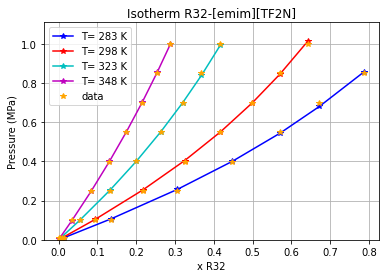

In [11]:
# for i in range(len(P)):
#     P[i] = P[i]*1e6
P1= np.zeros((len(P)))

for i in range(len(P)):
    P1[i] = P[i]/1e6

plt.plot(R32_x[0:7],P1[0:7],"b*-",label="T= 283 K")  
plt.plot(R32_x[7:15],P1[7:15],"r*-",label="T= 298 K") 
plt.plot(R32_x[15:23],P1[15:23],"c*-",label="T= 323 K") 
plt.plot(R32_x[23:31],P1[23:31],"m-*",label="T= 348 K")
plt.plot(data_full["x_R32"],data_full["pressure"]/1e6,"*",color='orange',label="data")  
plt.title('Isotherm R32-[emim][TF2N]')
plt.ylabel('Pressure (MPa)')
plt.xlabel('x R32')
plt.grid(True)
plt.ylim(0,1.110000)
plt.legend()
plt.show()